# IMOS - AusTemp - Sea Surface Temperature

|  |  |
| ----------- | ----------- |
| Author:| Leo Li |
| Edited:| Leo Li |
| Affiliation:| IMOS |
| e-mail:| info@aodn.org.au |
| Date of creation:| 2nd Apr., 2025 |
| Date of last update:| 2nd Apr., 2025 |

## Table of Contents
#### [Background](#background-what)
#### [Required Packages](#required)

### [Visualisation of AusTemp - Sea Surface Temperature ](#vis)

<a name="background-what"></a>
## Background

This dataset contains the summer Sea Surface Water Temperature anomalies (SSTa) from the 1st of December to the 30th of April since 2012 by comparing the current SST to long-term averages (1993-2003, the “CSIRO Legacy climatology” or 2002-2011, the “IMOS climatology”). The magnitude and duration of anomalously warm sea temperatures correlate well with past coral bleaching events. In cases where SST cannot be calculated due to cloud cover, the grid cell is left blank (white in web plots, transparent in Google Earth) to indicate missing data.

The ReefTemp Next Generation (RTNG) system was implemented and declared operational in the Bureau National Operations Centre (BNOC, formerly National Meteorological and
Oceanographic Centre) on 22 October 2013. The system is based on a new state-of-the-art Integrated Marine Observing System (IMOS) 1-day L3S night-only Sea Surface Temperature (SST)
product, which produces high-resolution satellite-based nowcasts of SST, thermal stress and associated coral bleaching risk over the Great Barrier Reef.

This product follows on from the decommissioned ReefTemp Next Generation a high resolution mapping product that provided information on coral bleaching risk for the Great Barrier Reef region. The ReefTemp Next Generation system was developed by the Bureau of Meteorology for eReefs, under the National Plan for Environmental Information (NPEI) initiative. A research Version 1 (V1) system, available from 2007, was the result of a collaborative project between the Bureau of Meteorology, CSIRO Marine and Atmospheric Research and the Great Barrier Reef Marine Park Authority.

### Required Packages <a name="required"></a>

xarray==2024.7.0 \
pandas==2.2.2 \
numpy==2.1.1 \
matplotlib==3.9.2 \
scipy==1.14.1 \
cartopy==0.23.0 \
geopandas==1.0.1 \
zarr==2.18.1 \
cmocean==4.0.3 \
s3fs==2024.10.0 

In [21]:
# Environment setting for the notebook
# %pip install \
# xarray==2024.7.0 \
# pandas==2.2.2 \
# numpy==2.1.1 \
# matplotlib==3.9.2 \
# scipy==1.14.1 \
# cartopy==0.23.0 \
# geopandas==1.0.1 \
# zarr==2.18.1 \
# cmocean==4.0.3 \
# s3fs==2024.10.0

# Visualization for the dataset of `satellite_austemp_sst-anomaly_australia.zarr` <a name="vis"></a>
#### This notebook demos how to use the Cloud Optimised Data (ZARR) of satellite_austemp_sst-anomaly_australia.zarr to extract and plot variables.

In [1]:
import xarray as xr
import s3fs 
import matplotlib.pyplot as plt

### Connect to the data of `austemp_sstanomaly_australia` from s3

In [2]:
ssta_zarr_path = "s3://aodn-cloud-optimised/satellite_austemp_sst-anomaly_australia.zarr/"
fs = s3fs.S3FileSystem(anon=True)

ssta_zarr_store = s3fs.S3Map(root=ssta_zarr_path, s3=fs)
data = xr.open_zarr(ssta_zarr_store)
data

<xarray.Dataset> Size: 91GB
Dimensions:          (lat: 1890, lon: 2685, time: 499)
Coordinates:
  * lat              (lat) float32 8kB -8.21 -8.23 -8.25 ... -45.97 -45.99
  * lon              (lon) float32 11kB 110.0 110.0 110.1 ... 163.6 163.7 163.7
  * time             (time) datetime64[ns] 4kB 2023-11-17T15:20:00 ... 2025-0...
Data variables:
    sst              (time, lat, lon) float64 20GB ...
    sst_anom         (time, lat, lon) float64 20GB ...
    sst_anom_mosaic  (time, lat, lon) float64 20GB ...
    sst_mosaic       (time, lat, lon) float64 20GB ...
    sst_mosaic_age   (time, lat, lon) float32 10GB ...
Attributes: (12/39)
    Conventions:                CF-1.6,IMOS-1.4
    abstract:                   This dataset contains the summer Sea Surface ...
    acknowledgement:            Any users of IMOS data are required to clearl...
    author:                     Australian Ocean Data Network (AODN)
    author_email:               info@aodn.org.au
    cdm_data_type:              grid
    ...                         ...
    spatial_resolution:         0.02
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    start_time:                 20120101T122957Z
    stop_time:                  99991231T214701Z
    summary:                    AusTemp is a specialised remote sensing appli...
    title:                      Nighttime AusTemp: Sea Surface Water Temperat...

#### Quick plot every variable of the latest datetime

sst


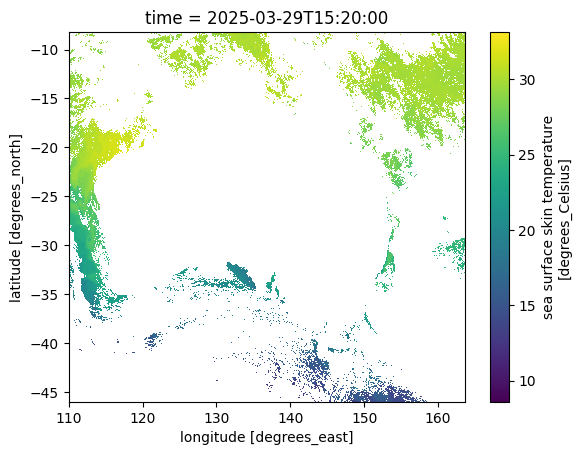

sst_anom


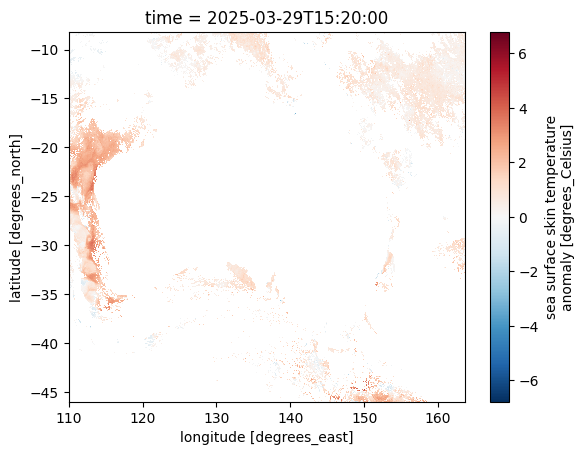

sst_anom_mosaic


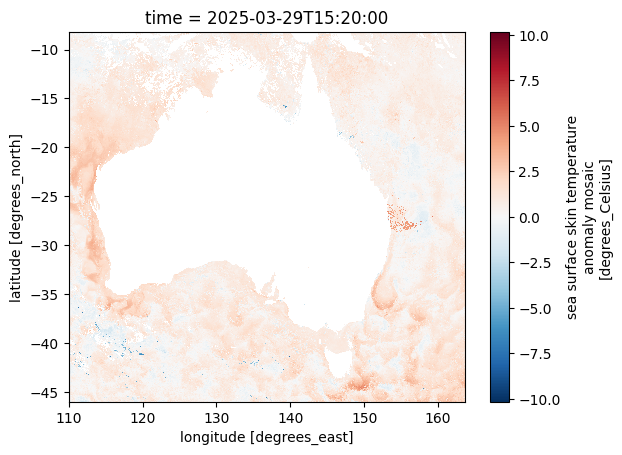

sst_mosaic


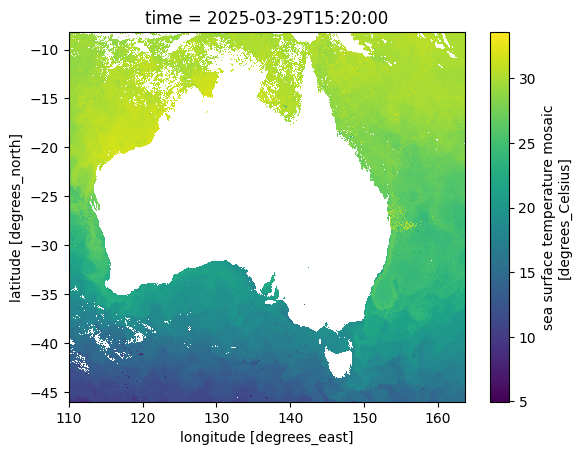

sst_mosaic_age


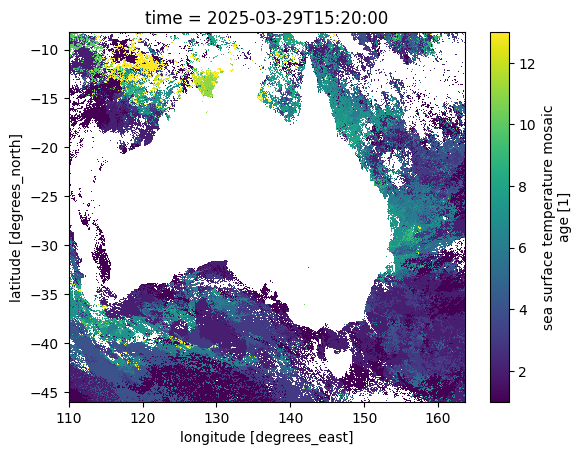

In [3]:
for var in data.data_vars:
    print(var)
    try:
        data[var].isel(time=-1).plot()
        plt.show()
    except:
        # print(f"Could not plot {var}")
        continue

#### Analyst a week temperature changes for the variable `sst1day` on GBR region

In [4]:

sst1day_202403 = data.sel(time=slice('2024-03-01', '2024-03-07')).sst
sst1day_202403

<xarray.DataArray 'sst' (time: 7, lat: 1890, lon: 2685)> Size: 284MB
[35522550 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 8kB -8.21 -8.23 -8.25 -8.27 ... -45.95 -45.97 -45.99
  * lon      (lon) float32 11kB 110.0 110.0 110.1 110.1 ... 163.6 163.7 163.7
  * time     (time) datetime64[ns] 56B 2024-03-01T15:20:00 ... 2024-03-07T15:...
Attributes:
    _ChunkSizes:  [1, 500, 500]
    comment:      The skin temperature of the ocean at a depth of approximate...
    long_name:    sea surface skin temperature
    units:        degrees_Celsius
    valid_max:    500.0
    valid_min:    0.0

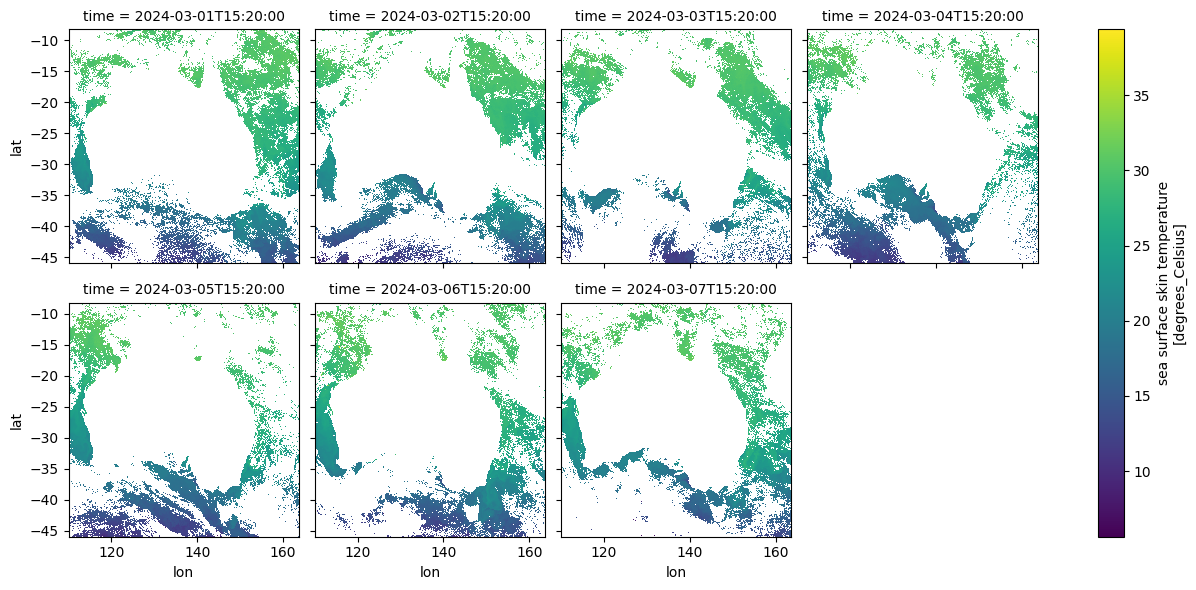

In [5]:
sst1day_202403.plot(col='time', col_wrap=4)

#### Quick plot of the variable of `sst` during 2024 summer period located at `Square Reef`
Google Map of `Square Reef` : https://www.google.com/maps/place/20%C2%B000'00.0%22S+150%C2%B000'00.0%22E/@-20.067047,149.812109,13.07z/data=!4m4!3m3!8m2!3d-20!4d150?authuser=0&entry=ttu&g_ep=EgoyMDI0MTIwMy4wIKXMDSoASAFQAw%3D%3D

In [6]:
Square_Reef_sst1day_2024 = data.sel(lat=-20.067047, lon=149.812109, method="nearest")\
    .sel(time=slice('2023-12-01', '2024-3-31'))\
    .sst
Square_Reef_sst1day_2024

<xarray.DataArray 'sst' (time: 122)> Size: 976B
[122 values with dtype=float64]
Coordinates:
    lat      float32 4B -20.07
    lon      float32 4B 149.8
  * time     (time) datetime64[ns] 976B 2023-12-01T15:20:00 ... 2024-03-31T15...
Attributes:
    _ChunkSizes:  [1, 500, 500]
    comment:      The skin temperature of the ocean at a depth of approximate...
    long_name:    sea surface skin temperature
    units:        degrees_Celsius
    valid_max:    500.0
    valid_min:    0.0

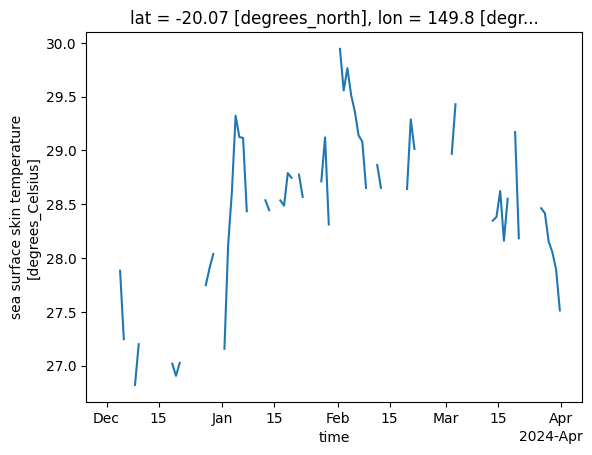

In [7]:
Square_Reef_sst1day_2024.plot()

#### Quick plot every variable during 2024 summer period located at `Square Reef`

sst


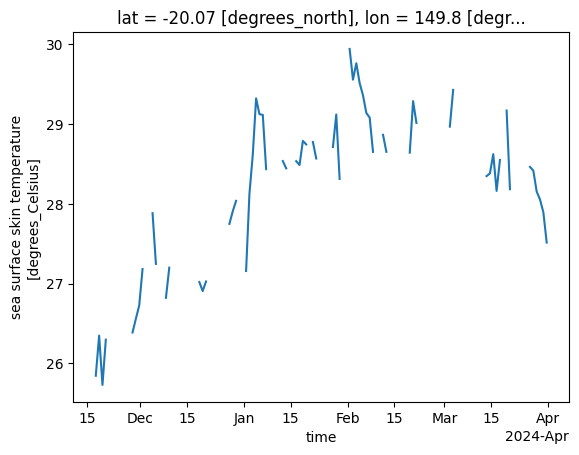

sst_anom


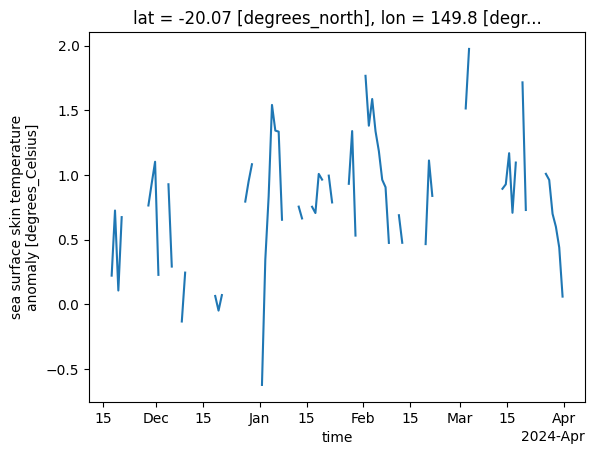

sst_anom_mosaic


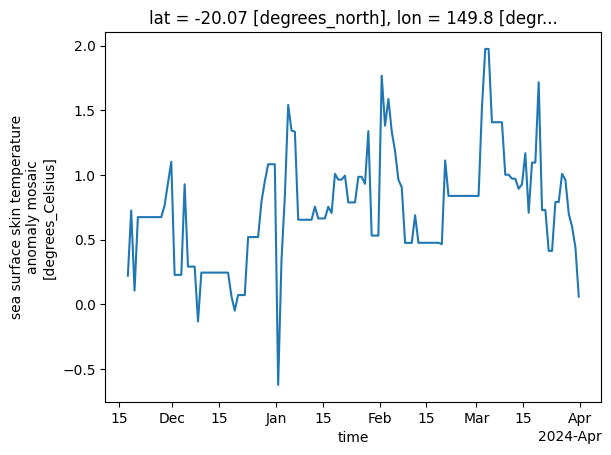

sst_mosaic


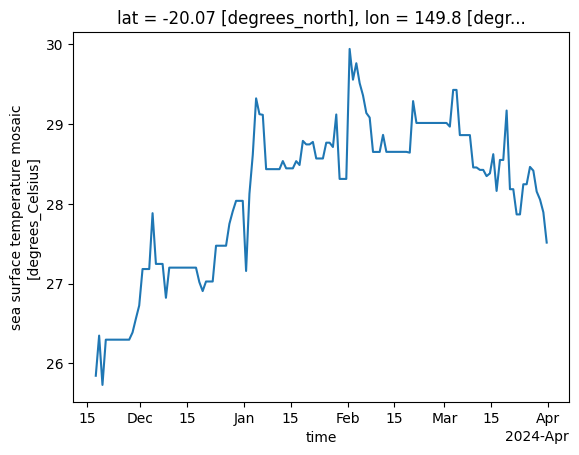

sst_mosaic_age


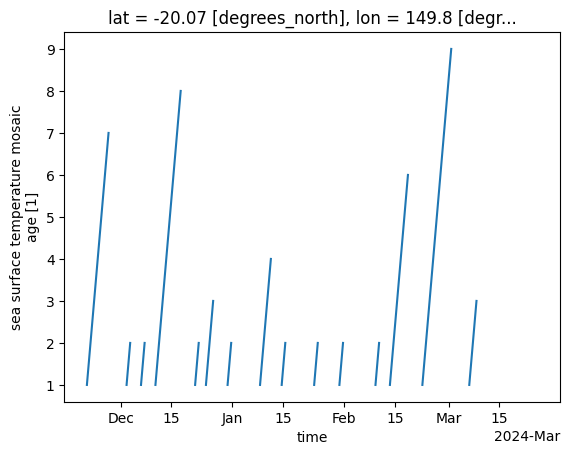

In [8]:
for var in data.data_vars:
    print(var)
    try:
        data[var].sel(lat=-20.067047, lon=149.812109, method="nearest")\
        .sel(time=slice('2023-03-01', '2024-03-31'))\
        .plot()
        plt.show()
    except:
        print(f"Could not plot {var}")
        continue

### Check the calculations using the entire grid
Below, we will create a new variable that will contain the `sst` data for 2024. 

We will then calculate a monthly mean and finally we plot the results to see the monthly mean temperature.

In [9]:
# Check the grouping and caculate speed with a whole year
sst1day_2024 = data.sst.sel(time=slice('2023-12-01', '2024-03-31'))
sst1day_2024

<xarray.DataArray 'sst' (time: 122, lat: 1890, lon: 2685)> Size: 5GB
[619107300 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 8kB -8.21 -8.23 -8.25 -8.27 ... -45.95 -45.97 -45.99
  * lon      (lon) float32 11kB 110.0 110.0 110.1 110.1 ... 163.6 163.7 163.7
  * time     (time) datetime64[ns] 976B 2023-12-01T15:20:00 ... 2024-03-31T15...
Attributes:
    _ChunkSizes:  [1, 500, 500]
    comment:      The skin temperature of the ocean at a depth of approximate...
    long_name:    sea surface skin temperature
    units:        degrees_Celsius
    valid_max:    500.0
    valid_min:    0.0

In [10]:
sst1day_2024_monthly = sst1day_2024.groupby("time.month").mean()
sst1day_2024_monthly

<xarray.DataArray 'sst' (month: 4, lat: 1890, lon: 2685)> Size: 162MB
array([[[29.09030957, 29.63050822, 29.33808311, ..., 30.86531342,
         30.80673357, 30.86110632],
        [29.74259613, 29.4096582 , 29.24479693, ..., 30.86615187,
         30.78616904, 30.72357853],
        [29.45414137, 29.37280838, 29.33135067, ..., 30.67538233,
         30.62148079, 30.6779867 ],
        ...,
        [11.79170532, 11.7137527 , 11.64453402, ..., 14.26775095,
         14.17634373, 14.47427902],
        [11.78622566, 11.71105208, 11.45248545, ..., 14.35600058,
         14.33140676, 14.32678032],
        [11.93717465, 11.74065079, 11.81253654, ..., 14.39498129,
         14.39464004, 14.4277884 ]],

       [[29.75219765, 29.80847387, 29.9476667 , ..., 29.66116999,
         29.56439722, 29.65351722],
        [29.86430342, 29.81446943, 29.76782122, ..., 29.67632262,
         29.64578547, 29.71119944],
        [29.91724361, 29.95432476, 29.68736538, ..., 29.74329164,
         29.85383286, 29.64188789],
...
        [11.59774602, 11.12075252, 11.41699755, ..., 14.1658598 ,
         14.12378858, 14.16033695],
        [11.27776602, 11.38140687, 11.4231022 , ..., 14.08024002,
         14.21187155, 14.10088067],
        [11.17750262, 11.18610733, 11.18773081, ..., 14.17471585,
         13.94171781, 14.05370798]],

       [[28.11218344, 28.08137449, 28.00928307, ..., 29.95579921,
         29.92926775, 29.9423498 ],
        [28.07627949, 28.08709078, 28.0487418 , ..., 29.96894609,
         29.91027062, 29.93564856],
        [28.0536369 , 28.07679663, 28.05159196, ..., 29.95933484,
         29.94173423, 29.97461549],
        ...,
        [10.76560659, 10.90265186, 10.9610109 , ..., 13.20301614,
         13.17999348, 13.27036097],
        [11.00555823, 10.87881924, 11.02749576, ..., 13.26579365,
         13.26942998, 13.11502015],
        [10.72931936, 11.02430999, 10.57362413, ..., 13.18509769,
         13.14777563, 12.98822224]]])
Coordinates:
  * lat      (lat) float32 8kB -8.21 -8.23 -8.25 -8.27 ... -45.95 -45.97 -45.99
  * lon      (lon) float32 11kB 110.0 110.0 110.1 110.1 ... 163.6 163.7 163.7
  * month    (month) int64 32B 1 2 3 12
Attributes:
    _ChunkSizes:  [1, 500, 500]
    comment:      The skin temperature of the ocean at a depth of approximate...
    long_name:    sea surface skin temperature
    units:        degrees_Celsius
    valid_max:    500.0
    valid_min:    0.0

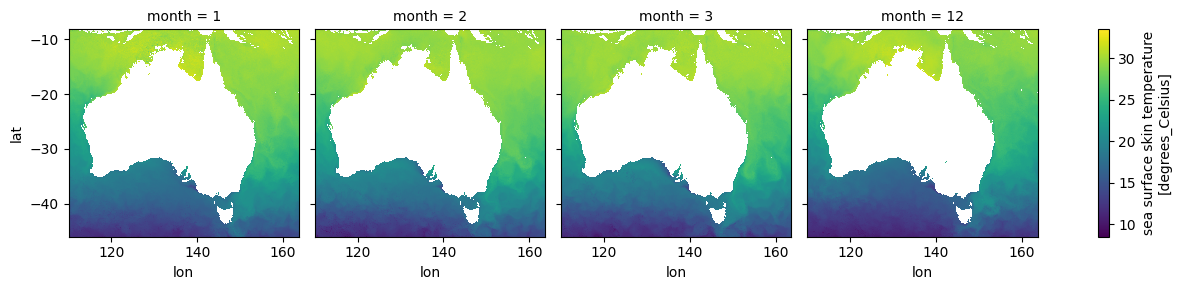

In [11]:
sst1day_2024_monthly.plot(col='month', col_wrap=4)

## The demo for BOM sst plotting by using zarr

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap
import pandas as pd
from shapely.geometry import box
import cmocean as cmo


In [13]:
# Define the domain (GBR REGION) for the plot
lat_min = -25.5
lat_max = -10.0
lon_min = 142.0
lon_max = 155.0

# Define custom color palette for sst plot
ReeftempNG_sst = [
    '#6B9E56', '#9EC08A', '#D1E2BE', '#FFFFCC', '#FFFF00', '#FFE900', 
    '#FFBF00', '#FF8A00', '#FF5F00', '#FF0900', '#EB0000', '#B30000', 
    '#890000', '#4C0000', '#390000', '#130000'
]

# Define colorbar ticks for sst plot
colbar_ticks = np.arange(0, 170, 10)  # 0 to 160 in increments of 10

# Define major cities with their latitudes and longitudes
major_cities = [
    {"name": "Sydney", "lat": -33.8688, "lon": 151.2093},
    {"name": "Brisbane", "lat": -27.4698, "lon": 153.0251},
    {"name": "Perth", "lat": -31.9505, "lon": 115.8605},
    {"name": "Adelaide", "lat": -34.9285, "lon": 138.6007},
    {"name": "Darwin", "lat": -12.46113, "lon": 130.84185},
    {"name": "Townsville", "lat": -19.26639, "lon": 146.80569},
    {"name": "Cairns", "lat": -16.92366, "lon": 145.76613},
    {"name": "Rockhampton", "lat": -23.38032, "lon": 150.50595}
]

def round_to_nearest_5(value):
    return round(value / 5) * 5

# The function refers the BOM austemp repo and modified for sst plot by using zarr
# https://github.com/bomRob/austemp/blob/dev/src/plot_sst.py
def plot_sst_by_date(
    zarr, 
    variable,
    date, 
    lat_min, 
    lat_max, 
    lon_min, 
    lon_max, 
    title,
    output_file=None, 
    marine_parks_file=None
):
    """
    Plot the Degree Heating Days (sst) data for a specific date by using zarr.
    
    Parameters:
        zarr (xr.Dataset): The xarray dataset containing the sst data.
        variable (str): The variable name chose from zarr variables.
        date (str): The date in the format 'YYYY-MM-DD' to plot.
        lat_min (float): The minimum latitude for the plot domain.
        lat_max (float): The maximum latitude for the plot domain.
        lon_min (float): The minimum longitude for the plot domain.
        lon_max (float): The maximum longitude for the plot domain.
        output_file (str): The file path to save the plot as an image (e.g., 'sst_plot.png').
        marine_parks_file (str): The file path to the marine parks shapefile for plotting.
    """
    
    plt.figure(figsize=(10, 8), dpi=120)
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Select the sst data for the given date and variable
    data = zarr.sel(time=date)[variable]

    # Set plot extent based on domain
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    data = data.squeeze()

    # Set SST values of 0 to NaN, so they will be plotted as white (or handle invalid data as needed)
    data = data.where(~np.isnan(data), np.nan)

    # # Get the min and max values of the data for color bar scaling
    # if np.isnan(data.min().values) or np.isnan(data.max().values):
    #     vmin = 5
    #     vmax = 30
    # else:
    #     vmin = round_to_nearest_5(data.min().values)
    #     vmax = round_to_nearest_5(data.max().values)

    vmin = 5
    vmax = 30
    
    # Plot the SST data
    sst_plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), 
                         cmap = 'cmo.thermal',
                         cbar_kwargs={'label': '(°C)'},
                         vmin=vmin, vmax=vmax)
    
    
    # Add land and coastlines
    ax.add_feature(cfeature.LAND, edgecolor='k', facecolor='#D3D3D3', zorder=100)
    ax.add_feature(cfeature.COASTLINE, zorder=101)

    # Add major cities to the plot if they are within the domain
    for city in major_cities:
        if lat_min <= city["lat"] <= lat_max and lon_min <= city["lon"] <= lon_max:
            # Plot black point for the city
            ax.plot(city["lon"], city["lat"], marker='o', color='black', markersize=5, 
                    transform=ccrs.PlateCarree(), zorder=110)
            
            # Add label to the left of the city point
            ax.text(city["lon"] - 0.2, city["lat"], city["name"], transform=ccrs.PlateCarree(), 
                    fontsize=10, verticalalignment='center', horizontalalignment='right', 
                    zorder=111, color='black')
    
    # Add marine park boundaries if provided
    if marine_parks_file is not None:
        marine_parks = gpd.read_file(marine_parks_file)

        # Filter for GBR and Australian EEZ parks
        marine_parks_gbr = marine_parks[marine_parks['NAME'].str.contains("Great Barrier Reef", case=False)]

        # Define bounding box for the lat/lon bounds
        bounding_box = box(lon_min, lat_min, lon_max, lat_max)
        
        # Clip the parks to the bounding box
        marine_parks_gbr_clipped = gpd.clip(marine_parks_gbr, bounding_box)

        # Plot the clipped marine parks
        ax.add_geometries(marine_parks_gbr_clipped.geometry, crs=ccrs.PlateCarree(), facecolor='none', 
                          edgecolor='black', linewidth=1, zorder=105, label='GBR Area')

    # Add grid labels
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=111)
    gl.top_labels = False  # Disable top labels
    gl.right_labels = False  # Disable right labels
    gl.left_labels = True   # Enable left labels (latitude)
    gl.bottom_labels = True  # Enable bottom labels (longitude)

    # Manually add a small legend in the bottom-left corner
    legend_x = 0.02  # x position of the legend box
    legend_y = 0.05  # y position of the legend box

    # Add a white box for "No Data"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y), 0.02, 0.02, transform=ax.transAxes, 
                                    color='white', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y + 0.01, "No Data", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add a light grey box for "Land"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y - 0.03), 0.02, 0.02, transform=ax.transAxes, 
                                    color='#D3D3D3', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y - 0.02, "Land", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add thick black border using plt.Rectangle
    rect = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, 
                         linewidth=3, edgecolor='black', facecolor='none', zorder=120)
    ax.add_patch(rect)

    # Save the plot
    plt.title(title)
    
    if output_file is not None:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Plot saved to {output_file}")
    # plt.close()

### Plot the variable "sst" for a specific date from zarr

Plot saved to sst_plot_2024-01-30.png


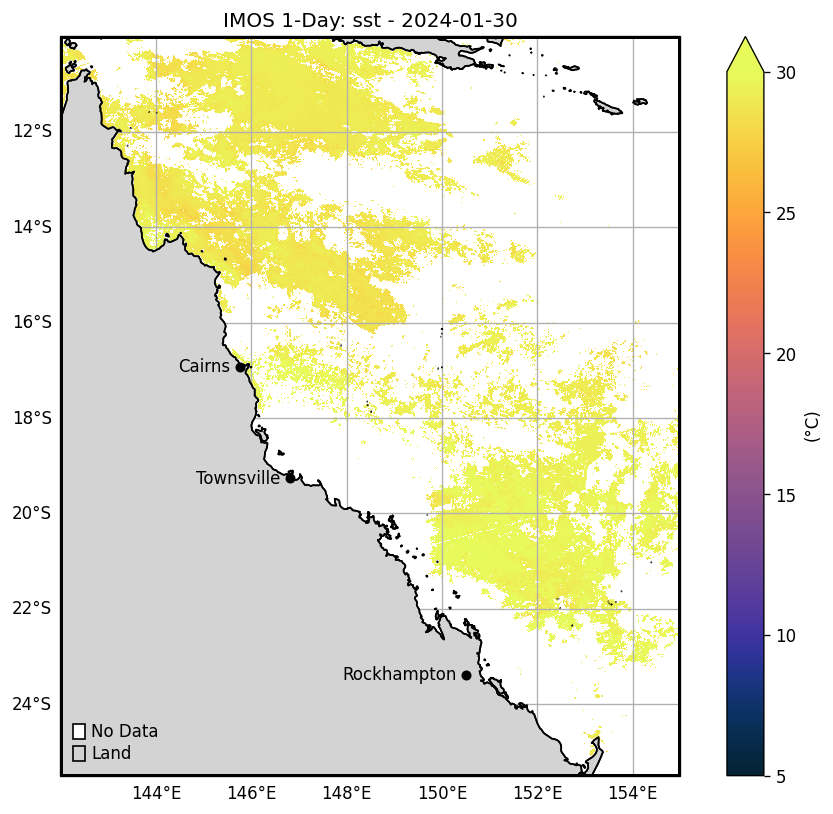

In [14]:

selected_date = "2024-01-30"
variable = "sst"
output_file = f"sst_plot_{selected_date}.png"
# Define the date for the plot
title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

Plot saved to sst_plot_2024-01-30.png


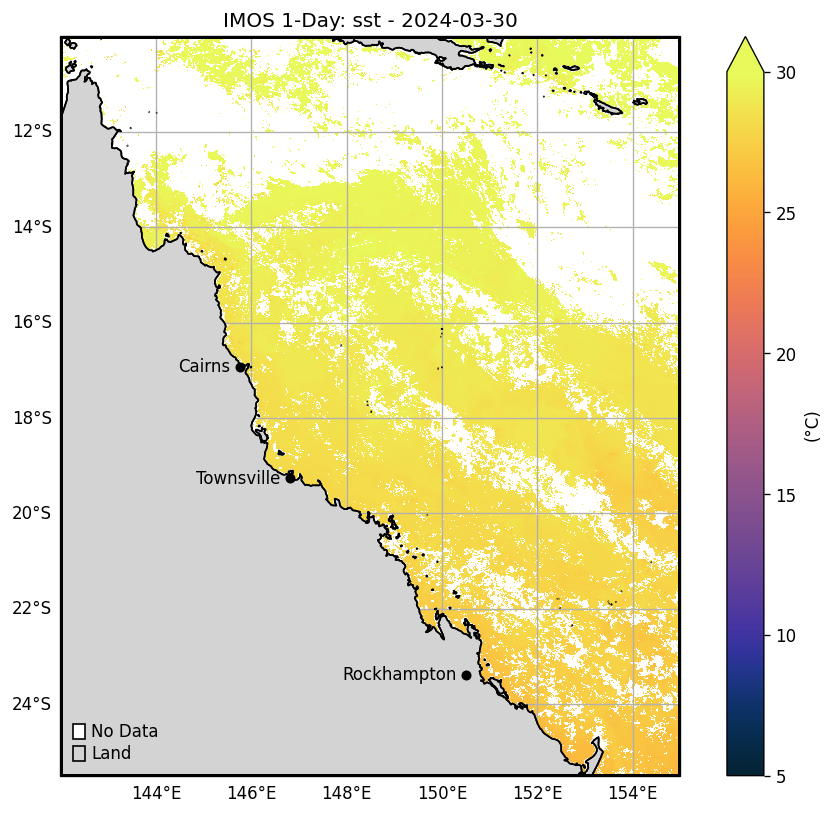

In [15]:
# Year-over-year comparison on the same date
selected_date = "2024-03-30"
variable = "sst"

# No output file specified, not saving the plot
title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

### Plot the variable "sst_mosaic" for a specific date from zarr

Plot saved to sst_mosaic_plot_2024-01-30.png


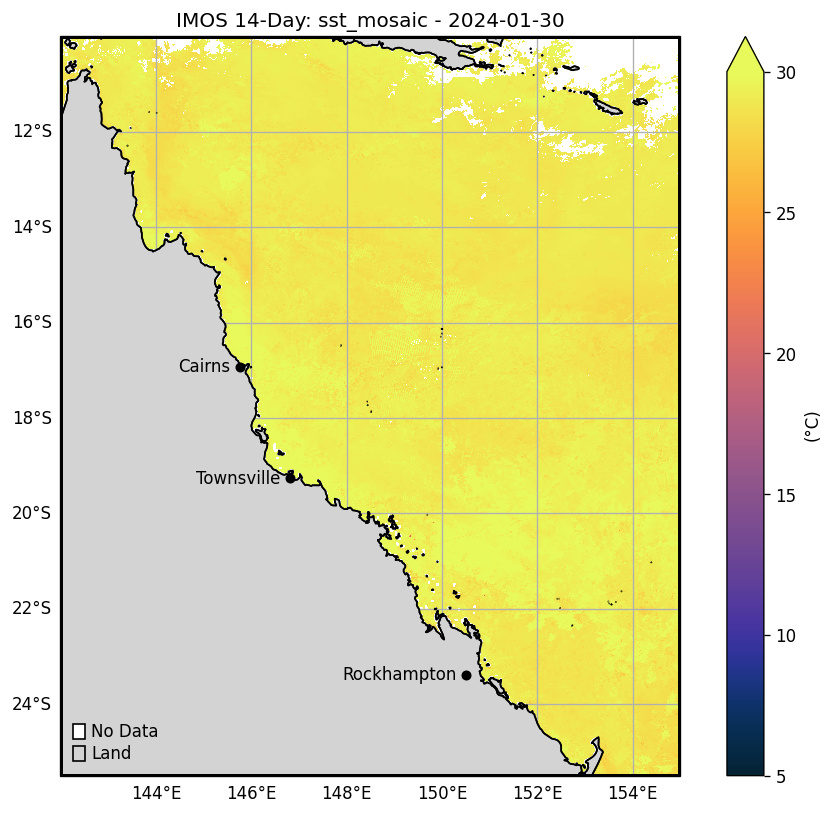

In [16]:
selected_date = "2024-01-30"
variable = "sst_mosaic"
output_file = f"sst_mosaic_plot_{selected_date}.png"
title = f"IMOS 14-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

Plot saved to sst_mosaic_plot_2024-01-30.png


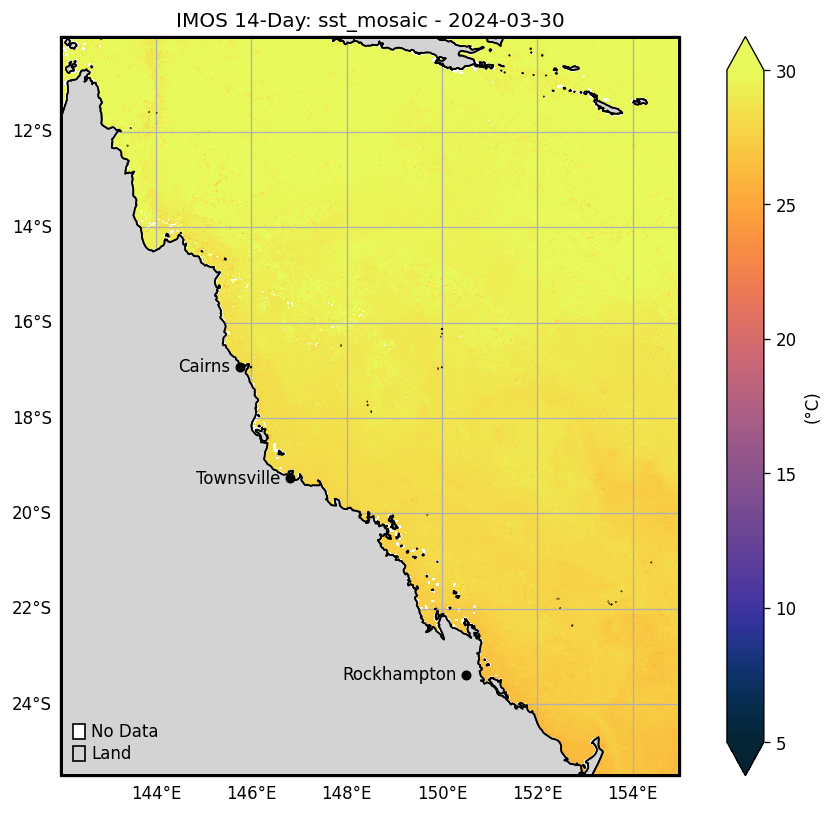

In [17]:
# Year-over-year comparison on the same date
selected_date = "2024-03-30"
variable = "sst_mosaic"

title = f"IMOS 14-Day: { variable} - {selected_date}"
plot_sst_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

### Plot the variable "ssta_mosaic_imos" for a specific date from zarr

In [18]:
# Define the domain (GBR REGION) for the plot
lat_min = -25.5
lat_max = -10.0
lon_min = 142.0
lon_max = 155.0

# Define custom color palette for sst plot
ReeftempNG_sst = [
    '#6B9E56', '#9EC08A', '#D1E2BE', '#FFFFCC', '#FFFF00', '#FFE900', 
    '#FFBF00', '#FF8A00', '#FF5F00', '#FF0900', '#EB0000', '#B30000', 
    '#890000', '#4C0000', '#390000', '#130000'
]

# Define colorbar ticks for sst plot
colbar_ticks = np.arange(0, 170, 10)  # 0 to 160 in increments of 10

# Define major cities with their latitudes and longitudes
major_cities = [
    {"name": "Sydney", "lat": -33.8688, "lon": 151.2093},
    {"name": "Brisbane", "lat": -27.4698, "lon": 153.0251},
    {"name": "Perth", "lat": -31.9505, "lon": 115.8605},
    {"name": "Adelaide", "lat": -34.9285, "lon": 138.6007},
    {"name": "Darwin", "lat": -12.46113, "lon": 130.84185},
    {"name": "Townsville", "lat": -19.26639, "lon": 146.80569},
    {"name": "Cairns", "lat": -16.92366, "lon": 145.76613},
    {"name": "Rockhampton", "lat": -23.38032, "lon": 150.50595}
]

def round_to_nearest_5(value):
    return round(value / 5) * 5

# The function refers the BOM austemp repo and modified for sst plot by using zarr
# https://github.com/bomRob/austemp/blob/dev/src/plot_sst.py
def plot_ssta_by_date(
    zarr, 
    variable,
    date, 
    lat_min, 
    lat_max, 
    lon_min, 
    lon_max, 
    title,
    output_file=None, 
    marine_parks_file=None
):
    """
    Plot the Degree Heating Days (sst) data for a specific date by using zarr.
    
    Parameters:
        zarr (xr.Dataset): The xarray dataset containing the sst data.
        variable (str): The variable name chose from zarr variables.
        date (str): The date in the format 'YYYY-MM-DD' to plot.
        lat_min (float): The minimum latitude for the plot domain.
        lat_max (float): The maximum latitude for the plot domain.
        lon_min (float): The minimum longitude for the plot domain.
        lon_max (float): The maximum longitude for the plot domain.
        output_file (str): The file path to save the plot as an image (e.g., 'sst_plot.png').
        marine_parks_file (str): The file path to the marine parks shapefile for plotting.
    """
    
    plt.figure(figsize=(10, 8), dpi=120)
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Select the sst data for the given date and variable
    data = zarr.sel(time=date)[variable]

    # Set plot extent based on domain
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    data = data.squeeze()

    # Set SST values of 0 to NaN, so they will be plotted as white (or handle invalid data as needed)
    data = data.where(~np.isnan(data), np.nan)

    vmin = -5
    vmax = 5
        
    # Plot the SST data
    sst_plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), 
                         cmap = 'cmo.balance',
                         cbar_kwargs={'label': '(°C)'},
                         vmin=vmin, vmax=vmax)
    
    
    # Add land and coastlines
    ax.add_feature(cfeature.LAND, edgecolor='k', facecolor='#D3D3D3', zorder=100)
    ax.add_feature(cfeature.COASTLINE, zorder=101)

    # Add major cities to the plot if they are within the domain
    for city in major_cities:
        if lat_min <= city["lat"] <= lat_max and lon_min <= city["lon"] <= lon_max:
            # Plot black point for the city
            ax.plot(city["lon"], city["lat"], marker='o', color='black', markersize=5, 
                    transform=ccrs.PlateCarree(), zorder=110)
            
            # Add label to the left of the city point
            ax.text(city["lon"] - 0.2, city["lat"], city["name"], transform=ccrs.PlateCarree(), 
                    fontsize=10, verticalalignment='center', horizontalalignment='right', 
                    zorder=111, color='black')
    
    # Add marine park boundaries if provided
    if marine_parks_file is not None:
        marine_parks = gpd.read_file(marine_parks_file)

        # Filter for GBR and Australian EEZ parks
        marine_parks_gbr = marine_parks[marine_parks['NAME'].str.contains("Great Barrier Reef", case=False)]

        # Define bounding box for the lat/lon bounds
        bounding_box = box(lon_min, lat_min, lon_max, lat_max)
        
        # Clip the parks to the bounding box
        marine_parks_gbr_clipped = gpd.clip(marine_parks_gbr, bounding_box)

        # Plot the clipped marine parks
        ax.add_geometries(marine_parks_gbr_clipped.geometry, crs=ccrs.PlateCarree(), facecolor='none', 
                          edgecolor='black', linewidth=1, zorder=105, label='GBR Area')

    # Add grid labels
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, zorder=111)
    gl.top_labels = False  # Disable top labels
    gl.right_labels = False  # Disable right labels
    gl.left_labels = True   # Enable left labels (latitude)
    gl.bottom_labels = True  # Enable bottom labels (longitude)

    # Manually add a small legend in the bottom-left corner
    legend_x = 0.02  # x position of the legend box
    legend_y = 0.05  # y position of the legend box

    # Add a white box for "No Data"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y), 0.02, 0.02, transform=ax.transAxes, 
                                    color='white', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y + 0.01, "No Data", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add a light grey box for "Land"
    ax.add_patch(mpatches.Rectangle((legend_x, legend_y - 0.03), 0.02, 0.02, transform=ax.transAxes, 
                                    color='#D3D3D3', ec='black', lw=1, zorder=112))
    ax.text(legend_x + 0.03, legend_y - 0.02, "Land", transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', zorder=113)

    # Add thick black border using plt.Rectangle
    rect = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, 
                         linewidth=3, edgecolor='black', facecolor='none', zorder=120)
    ax.add_patch(rect)

    # Save the plot
    plt.title(title)
    
    if output_file is not None:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Plot saved to {output_file}")
    # plt.close()

Plot saved to ssta_mosaic_plot_2024-01-30.png


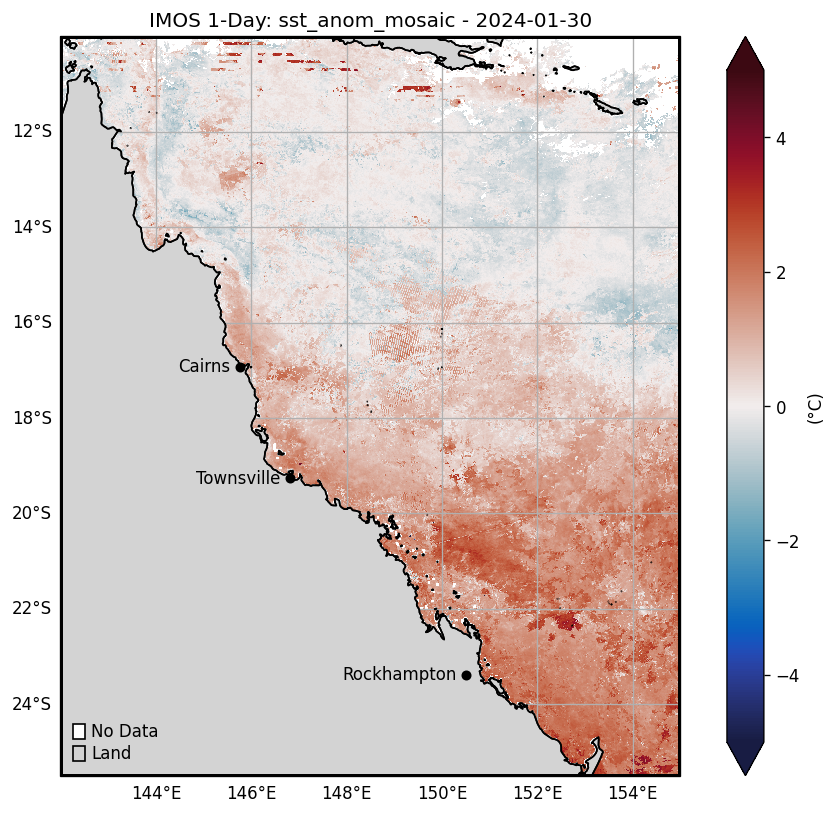

In [19]:
selected_date = "2024-01-30"
variable = "sst_anom_mosaic"
output_file = f"ssta_mosaic_plot_{selected_date}.png"

title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_ssta_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)

Plot saved to ssta_mosaic_plot_2024-03-30.png


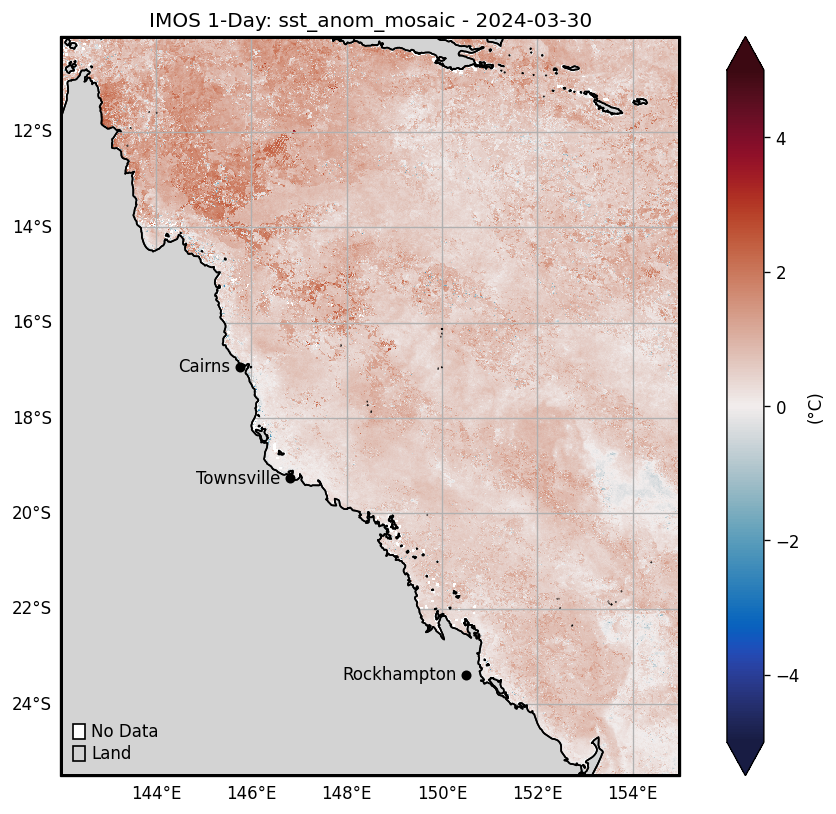

In [20]:
selected_date = "2024-03-30"
variable = "sst_anom_mosaic"
output_file = f"ssta_mosaic_plot_{selected_date}.png"

title = f"IMOS 1-Day: { variable} - {selected_date}"
plot_ssta_by_date(data, variable, selected_date, lat_min, lat_max, lon_min, lon_max, title, output_file=output_file)